# Capstone Project 2

## Book Recommendation using Different Features

Picking the best book to read is important in order to not spending long time to figure out if the book is right choice or not. This gets more critical if we spend same amount of time to read each book before finding the right one, specially, considering different genres, Publishers, Book Authors or Year of Publications. We can use this information and reader age and location to
recommend the best book to read by user. This can be done by using the ratings that have been given to previous books by readers. This recommendation system can help the reader to pick the best books and can generate the better results over time, when reader(s) give more rates to the book(s).
The tables and the fields are as below:
Users: User IDs, Location, Age
Books: ISBN, Book title, Book Author, Year of Publication, Publisher, Image_url_S, Image_url_M, Image_url_L
Rating: User IDs, ISBN, Book Rating

### Data Wrangling and Cleaning

In Data Cleaning Part, I need to explore the values in the column, which I have done it.then make the modification, if needed. at the end, I merge all three tables to work with only one table.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing tables
users = pd.read_table('D://Capstone Project 2//BX-CSV-Dump//BX-Users.csv',sep=';',encoding="ISO-8859-1")

ratings = pd.read_table('D://Capstone Project 2//BX-CSV-Dump///BX-Book-Ratings.csv',sep=';',encoding = 'unicode_escape')

books = pd.read_table('D://Capstone Project 2//BX-CSV-Dump//BX-Books.csv',sep=';',error_bad_lines=False,encoding="ISO-8859-1")



b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [3]:
# Users
#users=pd.concat([users.iloc[:,0].str.split(';',expand=True)],1).iloc[:,0:3]
#users.user_id = users.user_id.apply(lambda x: x.replace('"',''))
#users.location = users.location.apply(lambda x: x.replace('"',''))
#users.age = users.age.astype(str)
#users.age = users.age.apply(lambda x: x.replace('"',''))
users[['city','state','country']] = users['Location'].str.split(',',expand=True,).iloc[:,0:3]
#users = users.drop(['Location'],axis=1)
users.columns = ['user_id','Location','age','city','state','country']
users.head()

,user_id,Location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


let's list the uniques values of Age, so we can clean it if necessory.
data looks clean. but the range of values is not correct which we fix this issue later. 

In [4]:
users.age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [5]:
# Ratings
#ratings = pd.concat([ratings.iloc[:,0].str.split(';',expand=True)],1)
ratings.columns = ['user_id','isbn','rate']
#ratings.user_id = ratings.user_id.apply(lambda x: x.replace('"',''))
#ratings.isbn = ratings.isbn.apply(lambda x: x.replace('"',''))
#ratings.rate = ratings.rate.astype(str)
#ratings.rate = ratings.rate.apply(lambda x: x.replace('"',''))
ratings.head()

,user_id,isbn,rate
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Books
books = books.iloc[:,0:5]
books.columns = ['isbn','book_title','book_author','year_of_publication', 'publisher']
#books.isbn = books.isbn.apply(lambda x: x.replace('"',''))
#books.book_title = books.book_title.apply(lambda x: x.replace('"',''))
#books.book_author = books.book_author.apply(lambda x: x.replace('"',''))
#books.year_of_publication = books.year_of_publication.apply(lambda x: x.replace('"',''))
#books.publisher = books.publisher.apply(lambda x: x.replace('"',''))
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


now, we explore the values of year_of_publication. two values seem incorrect: 'Gallimard' and 'DK Publishing Inc'.

In [7]:
books.year_of_publication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [8]:
books.loc[books.year_of_publication == 'DK Publishing Inc',: ]
# this shows that values entered in wrong columns

,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [9]:
books.loc[books.isbn == '078946697X', 'year_of_publication'] = '2000'
books.loc[books.isbn == '0789466953', 'year_of_publication'] = '2000'
books.loc[books.isbn == '078946697X','book_author' ] = 'Michael Tetitelbaum'
books.loc[books.isbn == '0789466953','book_author' ] = 'James Buckley'
books.loc[books.isbn == '078946697X','publisher' ] = 'DK Publishing Inc'
books.loc[books.isbn == '0789466953','publisher' ] = 'DK Publishing Inc'

In [10]:
books.loc[books.year_of_publication == 'Gallimard',: ]

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [11]:
books.loc[books.isbn == '2070426769', 'year_of_publication'] = '2003'
books.loc[books.isbn == '078946697X','book_author' ] = 'Jean-Marie Gustave Le CIA?A@zio'
books.loc[books.isbn == '078946697X','publisher' ] = 'Gallimard'
books.loc[books.isbn == '078946697X','book_title' ] = "Peuple du ciel, suivi de 'Les Bergers"

In [12]:
# Looks Good!
books.year_of_publication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [13]:
# Merging the tables and organizing it
df = pd.merge(pd.merge(users, ratings,on='user_id'),books,on='isbn')
df = df[['user_id','isbn','city','state','country','Location','age','book_title','book_author','year_of_publication','publisher','rate']]
df.sort_values(['user_id','isbn'])
df.head()

,user_id,isbn,city,state,country,Location,age,book_title,book_author,year_of_publication,publisher,rate
0,2,0195153448,stockton,california,usa,"stockton, california, usa",18.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,8,0002005018,timmins,ontario,canada,"timmins, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
2,11400,0002005018,ottawa,ontario,canada,"ottawa, ontario, canada",49.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
3,11676,0002005018,n/a,n/a,n/a,"n/a, n/a, n/a",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8
4,41385,0002005018,sudbury,ontario,canada,"sudbury, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0


In [14]:
df.country[df.country == ' usa'] = 'usa'

In [15]:
#Taking care of missing values
#pd.Series(df['city'] == '').value_counts() #by using this query, we can count the number of values
#df.replace('n/a',np.nan,inplace=True)
#df.replace(' n/a',np.nan,inplace=True)
#df.replace(' ',np.nan,inplace=True)
#df.replace('',np.nan,inplace=True)
#df.replace('NULL',np.nan,inplace=True)
#df.fillna(np.nan,inplace = True)
df.age.replace('',np.nan,inplace=True)
df.age.replace(' ',np.nan,inplace=True)
df.head()

,user_id,isbn,city,state,country,Location,age,book_title,book_author,year_of_publication,publisher,rate
0,2,0195153448,stockton,california,usa,"stockton, california, usa",18.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,8,0002005018,timmins,ontario,canada,"timmins, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
2,11400,0002005018,ottawa,ontario,canada,"ottawa, ontario, canada",49.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
3,11676,0002005018,n/a,n/a,n/a,"n/a, n/a, n/a",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8
4,41385,0002005018,sudbury,ontario,canada,"sudbury, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0


In [16]:
#pd.Series(df['age']).value_counts()

In [17]:
# Fix the data type
df.user_id = df.user_id.astype('float')
df.age = df.age.astype('float')
df.rate = df.rate.astype('float')

In [18]:
# Replacing ages higher than 80 or less than 9 with NaN
df = df[(df.age <= 80)| (df.age >= 9)]
# Removing any years except before 2012
#df.year_of_publication.replace(['DK Publishing Inc','Gallimard'],np.nan,inplace=True)
# Removing zero from year_of_publication
df.year_of_publication = df.year_of_publication.astype('float')
#df.mask((df.year_of_publication == 0) | (df.year_of_publication >= 2020), inplace=True)
df = df[(df.year_of_publication <= 2005)|(df.year_of_publication != 0)]
# Removing rates that are 0 or nan
#df.mask(df.rate == 0,inplace=True)
df = df[df.rate > 0]

In [19]:
df.describe()

,user_id,age,year_of_publication,rate
count,269621.000000,269621.000000,269621.000000,269621.000000
mean,138267.658146,36.835829,1965.106423,7.736159
std,78900.842047,13.753045,245.512391,1.814527
min,19.000000,0.000000,0.000000,1.000000
25%,72261.000000,28.000000,1992.000000,7.000000
50%,135265.000000,35.000000,1998.000000,8.000000
75%,206768.000000,45.000000,2001.000000,9.000000
max,278852.000000,244.000000,2050.000000,10.000000


In [20]:
df.rate.unique()

array([ 8.,  7.,  6., 10.,  9.,  5.,  4.,  3.,  2.,  1.])

In [21]:
df.groupby('rate').size()

rate
1.0       886
2.0      1562
3.0      3331
4.0      5096
5.0     27744
6.0     21445
7.0     45539
8.0     64824
9.0     45251
10.0    53943
dtype: int64

### Data Visualization

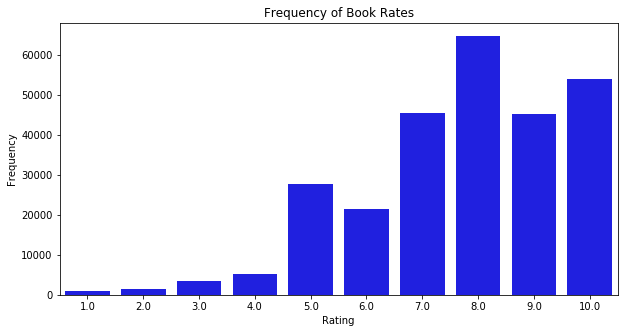

In [22]:
plt.subplots(figsize=(10,5))
ax = sns.countplot(x='rate', data=df,color='blue')
plt.title('Frequency of Book Rates')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

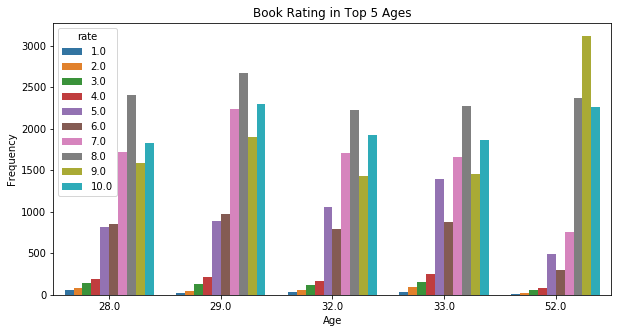

In [23]:
plt.subplots(figsize=(10,5))
sns.countplot(x="age", hue="rate", data=df,order=df.age.value_counts().iloc[:5].index.sort_values())
plt.title('Book Rating in Top 5 Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

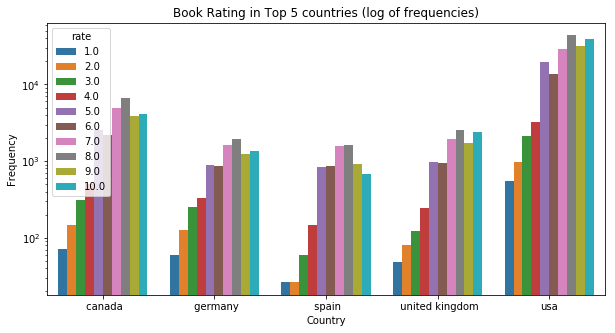

In [24]:
plt.subplots(figsize=(10,5))
sns.countplot(x="country", hue="rate", data=df,order=df.country.value_counts().iloc[:5].index.sort_values())
plt.yscale('log')
plt.title('Book Rating in Top 5 countries (log of frequencies)')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

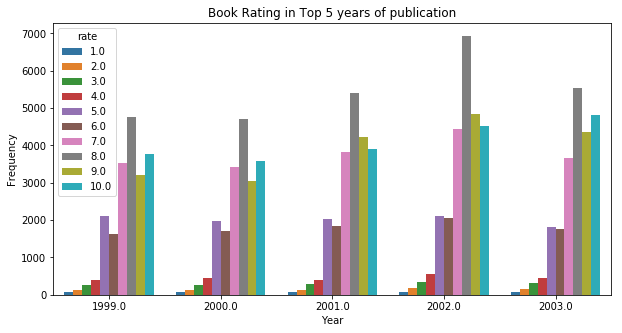

In [25]:
plt.subplots(figsize=(10,5))
sns.countplot(x="year_of_publication", hue="rate", data=df,order=df.year_of_publication.value_counts().iloc[:5].index.sort_values())
plt.title('Book Rating in Top 5 years of publication')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

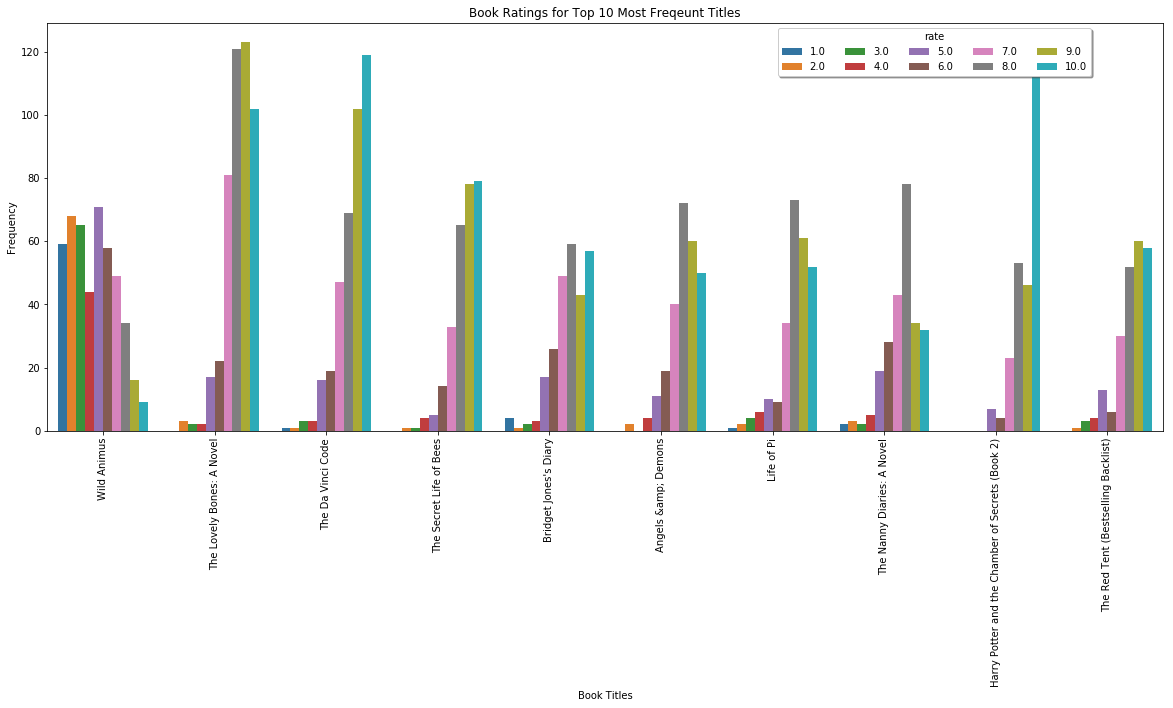

In [26]:
plt.subplots(figsize=(20,7.5))
sns.countplot(x="book_title", hue="rate", data=df,order=df.book_title.value_counts().iloc[:10].index)
plt.title('Book Ratings for Top 10 Most Freqeunt Titles')
plt.xlabel('Book Titles')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(0.65, 1),ncol=5, fancybox=True, shadow=True,title='rate')
plt.show()

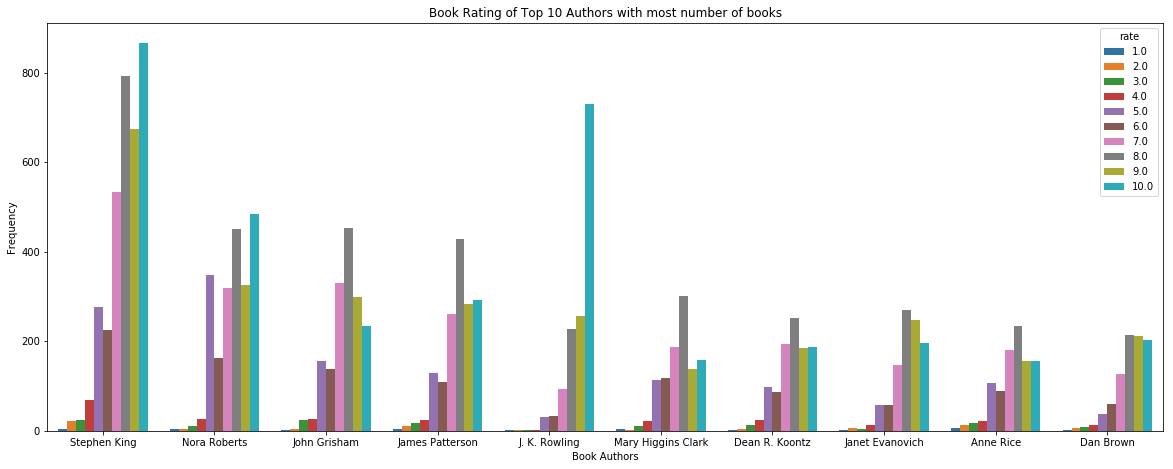

In [27]:
plt.subplots(figsize=(20,7.5))
sns.countplot(x="book_author", hue="rate", data=df,order=df.book_author.value_counts().iloc[:10].index)
plt.title('Book Rating of Top 10 Authors with most number of books')
plt.xlabel('Book Authors')
plt.ylabel('Frequency')
plt.show()

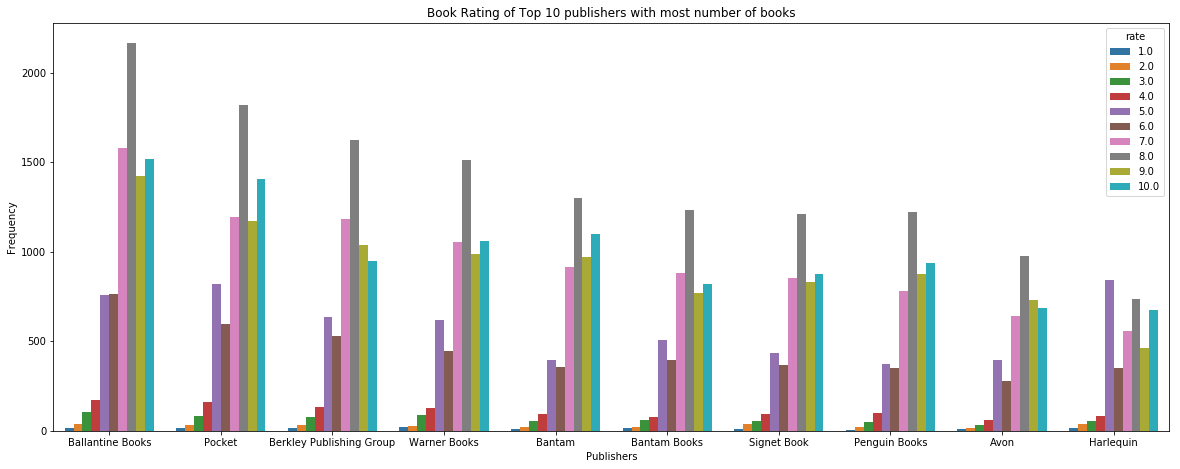

In [28]:
plt.subplots(figsize=(20,7.5))
sns.countplot(x="publisher", hue="rate", data=df,order=df.publisher.value_counts().iloc[:10].index)
plt.title('Book Rating of Top 10 publishers with most number of books')
plt.xlabel('Publishers')
plt.ylabel('Frequency')
plt.show()

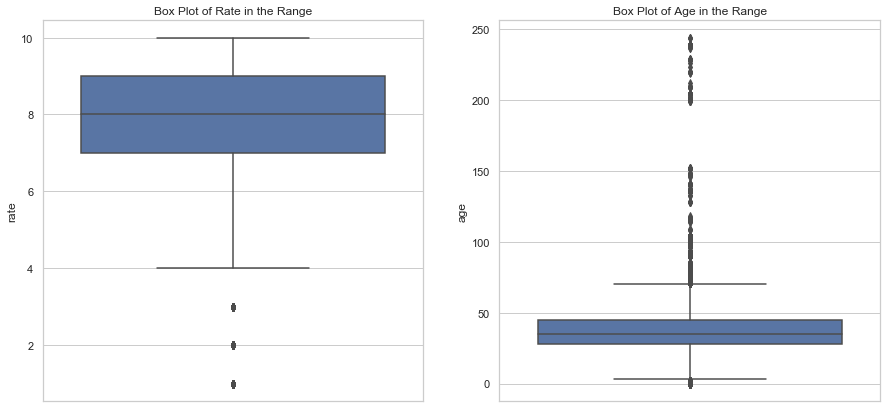

In [29]:
plt.subplots(figsize=(15,7))
sns.set(style="whitegrid")
plt.subplot(1,2,1)
sns.boxplot(y=df.rate)
plt.title('Box Plot of Rate in the Range')
plt.subplot(1,2,2)
sns.boxplot(y=df.age)
plt.title('Box Plot of Age in the Range')
plt.show()

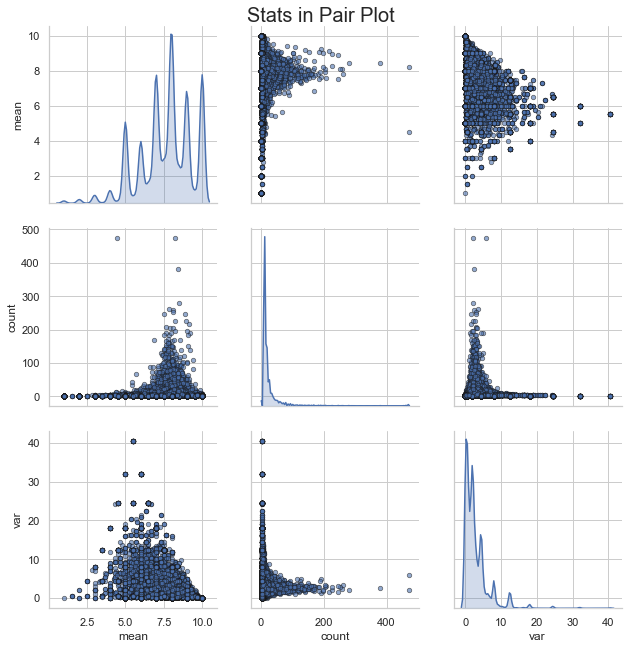

In [30]:
stats = df.groupby('book_title')['rate'].agg(['mean', 'count','std','var'])
sns.pairplot(stats[['mean', 'count', 'var']],diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': 'k'},height = 3)
plt.suptitle('Stats in Pair Plot',y=1,fontsize=20)
plt.show()

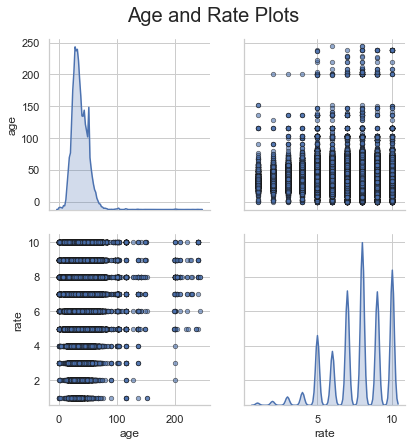

In [31]:
sns.pairplot(df[['age', 'rate']],diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': 'k'},height = 3)
plt.suptitle('Age and Rate Plots',y=1.03,fontsize=20)
plt.show()

In [32]:
x1 = df[(df.age >= 8)|(df.age <= 110)]
x2 = df[(df.rate >= 1)|(df.rate <= 10)]
x3 = df.groupby('user_id')['rate'].mean()
x4 = df.groupby('book_title')['rate'].mean()

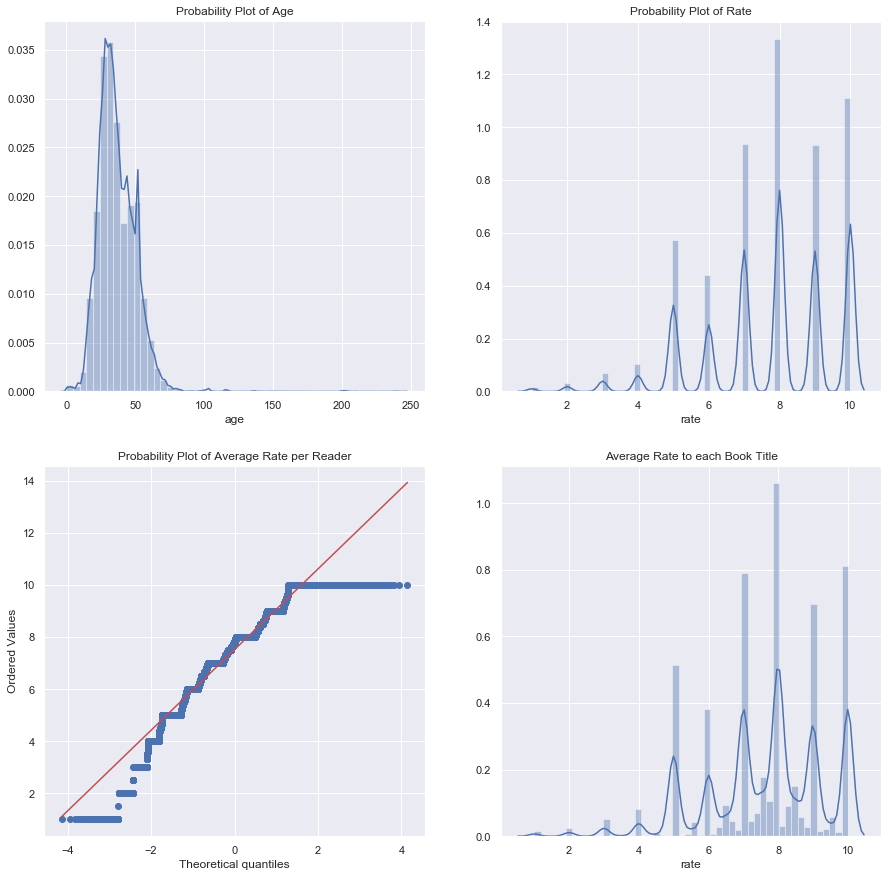

In [33]:
sns.set()
plt.subplots(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(x1.age)
plt.title('Probability Plot of Age')
plt.subplot(2,2,2)
sns.distplot(x2.rate)
plt.title('Probability Plot of Rate')
plt.subplot(2,2,3)
from scipy import stats
stats.probplot(x3, plot=plt)
plt.title('Probability Plot of Average Rate per Reader')
plt.subplot(2,2,4)
sns.distplot(x4)
plt.title('Average Rate to each Book Title')
plt.show()

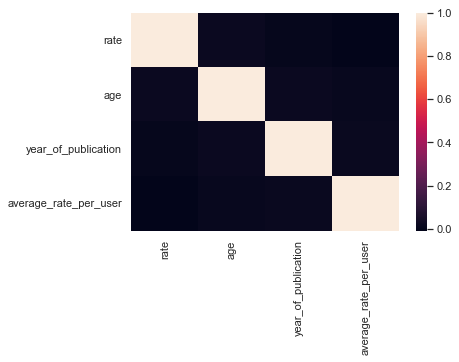

In [34]:
df['average_rate_per_user'] = df.groupby('user_id')['rate'].mean()
numerical_cols = ['rate', 'age', 'year_of_publication','average_rate_per_user']

corr = df[numerical_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()



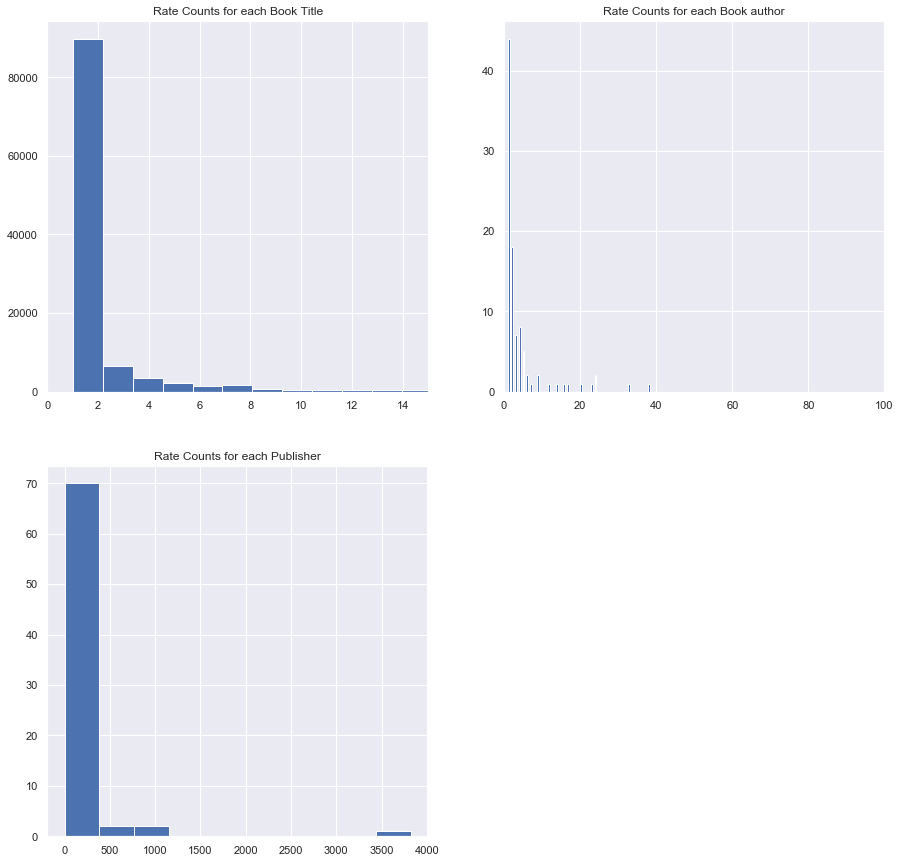

In [35]:
ratings_mean_count = pd.DataFrame(df.groupby('book_title')['rate'].mean())
ratings_mean_count['rating_title_count'] = pd.DataFrame(df.groupby('book_title')['rate'].count())
ratings_mean_count['rating_author_count'] = pd.DataFrame(df.groupby('book_author')['rate'].count())
ratings_mean_count['rating_publisher_count'] = pd.DataFrame(df.groupby('publisher')['rate'].count())
ratings_mean_count['rating_user_count'] = pd.DataFrame(df.groupby('user_id')['rate'].count())
plt.figure(figsize=(15,15))
sns.set_style('dark') 
#%matplotlib inline
plt.subplot(2,2,1)
plt.xlim([0, 15])
plt.title('Rate Counts for each Book Title')
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_title_count'].hist(bins=400)
plt.subplot(2,2,2) 
plt.xlim([0, 100])
plt.title('Rate Counts for each Book author')
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_author_count'].hist(bins=400)
plt.subplot(2,2,3)
plt.title('Rate Counts for each Publisher')
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_publisher_count'].hist(bins=10)
plt.show()

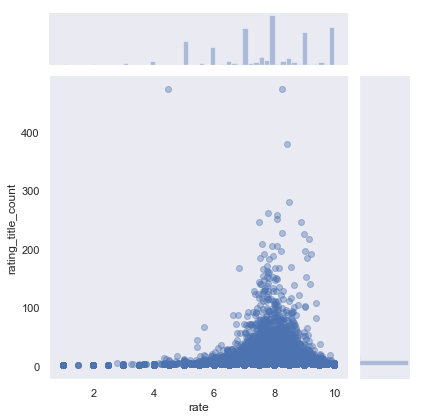

In [36]:
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rate', y='rating_title_count', data=ratings_mean_count, alpha=0.4) 
plt.show()

#### Conclusion

1) Majority of readers gave the rate of 8 by and 10,7 and 9 are the next popular rates.

2) Age range of 28-33 and 52 is the age range of readers. they give higher rates to the books as well.

3) story and novel books have the highest popularity. Da Vinci Code is one of the popular books. the rates for each one of the top 10 books have been visualized as well.

4) Stephen King is the most popular author with rates of 10 from many of the readers. top 10 Authors and their rates have been presented as well.

5) Ballentine book is the most frequent publisher. Top 10 publishers and their rates have been presented as well.

6) USA has the highest number of books. Top 5 countries have been presented.

7) Majority of books have been written between 1999-2003.

8) few outliers have been detected by using box plots, but they are in normal range, so they are not removed from dataset.

10) Mean, Count and Variance plots show they are skewed to one side.

11) Probabilty plots don't show any distribution.

12) Majority of books have just few rates in dataset. some of the book have many rates.

### Statistical Inference
We can test the age groups. but first, we should create different age groups. we first study distribution of rate and age columns. let's see if they have normal distribution. results show that none of them have normal distribution.

In [37]:
# Using D'Agostino and Pearson's Test for normality test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df['rate']
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=19639.312, p=0.000
Sample does not look Gaussian (reject H0)


In [38]:
# Using D'Agostino and Pearson's Test for normality test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df['age']
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=153232.895, p=0.000
Sample does not look Gaussian (reject H0)


### 1) Does any age group give significantly higher rates compared to others?
1) First, create a new dataframe including user_id, age and rate. then drop the rows with missing age.
2) create the age groups from age.
3) do ANOVA to see if there is at least one significant group 
4) if so, do tukey test to find that group

In [39]:
(df.age.min(),df.age.max())

(0.0, 244.0)

In [40]:
# 1
df2 = df[['user_id','age','rate']]
df2.rate.fillna(0,inplace=True)
df2.dropna(subset=['age'],inplace=True)

In [41]:
# 2
def age_groups(x):
    if x.age <= 19:
        return '9-19'
    if x.age <= 25:
        return '19-25'
    if x.age <= 35:
        return '25-35'
    if x.age <= 45:
        return '35-45'
    if x.age <= 55:
        return '45-55'
    if x.age <= 65:
        return '55-65'
    if x.age <= 75:
        return '65-75'
    if x.age > 75:
        return '75+'
    
df2['age_category'] = df2.apply(age_groups, axis = 1)

In [42]:
# 3
from scipy import stats
F, p = stats.f_oneway(df2['rate'].loc[df2.age_category == '9-19'],df2['rate'].loc[df2.age_category == '19-25'],df2['rate'].loc[df2.age_category == '25-35'],df2['rate'].loc[df2.age_category == '35-45'],df2['rate'].loc[df2.age_category == '45-55'],df2['rate'].loc[df2.age_category == '55-65'],df2['rate'].loc[df2.age_category == '65-75'],df2['rate'].loc[df2.age_category == '75+'])
F,p

(99.0294026253759, 3.117562810112737e-145)

In [43]:
# 4
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df2['rate'],df2['age_category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
19-25  25-35  -0.0644  -0.0999 -0.0289  True 
19-25  35-45  -0.0097  -0.0474  0.028  False 
19-25  45-55   0.1811   0.1412  0.2209  True 
19-25  55-65   0.0141  -0.0397  0.0679 False 
19-25  65-75   -0.065  -0.1624  0.0324 False 
19-25   75+    -0.414  -0.5556 -0.2724  True 
19-25   9-19  -0.0732  -0.1254  -0.021  True 
25-35  35-45   0.0548   0.0262  0.0833  True 
25-35  45-55   0.2455   0.2142  0.2768  True 
25-35  55-65   0.0786   0.0307  0.1264  True 
25-35  65-75  -0.0006  -0.0948  0.0937 False 
25-35   75+   -0.3496   -0.489 -0.2101  True 
25-35   9-19  -0.0087  -0.0548  0.0373 False 
35-45  45-55   0.1907   0.1569  0.2246  True 
35-45  55-65   0.0238  -0.0257  0.0733 False 
35-45  65-75  -0.0553  -0.1504  0.0398 False 
35-45   75+   -0.4043  -0.5444 -0.2643  True 
35-45   9-19  -0.0635  -0.1113 -0.0157  True 
45-55  55-65  -0.1669  -0.218

### 2) Does readers give significantly higher rates to books in specific year of publication?
1) First, create a new dataframe including user_id, age and year_of_publication. then drop the rows with missing year of publication.
2) create the publication year groups.
3) do ANOVA to see if there is at least one significant group 
4) if so, do tukey test to find that group

In [44]:
# 1
df3 = df[['user_id','age','rate','book_title', 'year_of_publication']]
df3.rate.fillna(0,inplace=True)
df3.dropna(subset=['year_of_publication'],inplace=True)
(df3.year_of_publication.min(),df3.year_of_publication.max())

(0.0, 2050.0)

In [45]:
# 2
def year_groups(x):
    if x.year_of_publication <= 1800:
        return '1800-'
    if x.year_of_publication <= 1850:
        return '1800-1850'
    if x.year_of_publication <= 1900:
        return '1850-1900'
    if x.year_of_publication <= 1950:
        return '1900-1950'
    if x.year_of_publication <= 1970:
        return '1950-1970'
    if x.year_of_publication <= 1990:
        return '1970-1990'
    if x.year_of_publication <= 2000:
        return '1990-2000'
    if x.year_of_publication > 2000:
        return '2000+'
    
df3['year_category'] = df3.apply(year_groups, axis = 1)

In [46]:
# 3
from scipy import stats
F, p = stats.f_oneway(df3['rate'].loc[df3.year_category == '1800-'],df3['rate'].loc[df3.year_category == '1800-1850'],df3['rate'].loc[df3.year_category == '1850-1900'],df3['rate'].loc[df3.year_category == '1900-1950'],df3['rate'].loc[df3.year_category == '1950-1970'],df3['rate'].loc[df3.year_category == '1970-1990'],df3['rate'].loc[df3.year_category == '1990-2000'],df3['rate'].loc[df3.year_category == '2000+'])
F,p

(nan, nan)

In [47]:
# 4
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df3['rate'],df3['year_category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  1800-   1850-1900 -0.6417  -5.9885  4.7051 False 
  1800-   1900-1950  0.5517   0.1988  0.9046  True 
  1800-   1950-1970  0.3977   0.2583  0.5371  True 
  1800-   1970-1990  0.1585   0.0719  0.2452  True 
  1800-   1990-2000  0.0356  -0.0487  0.1199 False 
  1800-     2000+    0.1525   0.0673  0.2377  True 
1850-1900 1900-1950  1.1934  -4.1637  6.5505 False 
1850-1900 1950-1970  1.0395  -4.3078  6.3868 False 
1850-1900 1970-1990  0.8002   -4.546  6.1464 False 
1850-1900 1990-2000  0.6773  -4.6689  6.0234 False 
1850-1900   2000+    0.7942   -4.552  6.1404 False 
1900-1950 1950-1970  -0.154  -0.5147  0.2068 False 
1900-1950 1970-1990 -0.3932   -0.737 -0.0494  True 
1900-1950 1990-2000 -0.5161  -0.8594 -0.1729  True 
1900-1950   2000+   -0.3992  -0.7427 -0.0557  True 
1950-1970 1970-1990 -0.2392  -0.3539 -0.1246  True 
1950-1970 19

#### Conclusion

1) Overall, younger Adults have significantly more interest to read the books. for example, 19-25 range have signicantly more interest (and highest rates) compared to 25-35 and 35-45. range of 9-19 has less interest to read the books. Full results have been presented by using tukey test.

2) People don't have interest to older books. the books that published more recently have the highest rates. we can see a pattern by studying the year of publication. Full results have been presented in the table.

## Recommendation Systems

In [48]:
# First take a smaller sample (I selected books and users with more than 100 rates)
counts1 = df['user_id'].value_counts()
df = df[df['user_id'].isin(counts1[counts1 >= 100].index)]
counts = df['rate'].value_counts()
df = df[df['rate'].isin(counts[counts >= 100].index)]

In [49]:
# divide the dataset to training and test data
def assign_to_set(x):
    sampled_ids = np.random.choice(x.index,
                                   size=np.int64(np.ceil(x.index.size * 0.2)),
                                   replace=False)
    x.ix[sampled_ids, 'for_testing'] = True
    return x

df['for_testing'] = False
grouped = df.groupby('user_id', group_keys=False).apply(assign_to_set)
df_train = df[grouped.for_testing == False]
df_test = df[grouped.for_testing == True]
print(df.shape)
print(df_train.shape)
print(df_test.shape)
assert len(df_train.index & df_test.index) == 0

(74627, 14)
(59557, 14)
(15070, 14)


In [50]:
# Compute RMSE
def compute_rmse(y_pred, y_true):
    """ Compute Root Mean Squared Error. """
    
    return np.abs(np.sqrt(np.mean(np.power(y_pred - y_true, 2))))

def evaluate(estimate_f):
    """ RMSE-based predictive performance evaluation with pandas. """
    
    ids_to_estimate = zip(df_test.user_id, df_test.isbn)
    estimated = np.array([estimate_f(u,i) for (u,i) in ids_to_estimate])
    real = df_test.rate.values
    return compute_rmse(estimated, real)

#### Content Based Filter

In [51]:
# 1) Basic
def content_mean(user_id, isbn):
    """ Simple content-filtering based on mean ratings. """
    
    user_condition = df_train.user_id == user_id
    book_condition = df_train.isbn != isbn
    rating_other_books = df_train.loc[user_condition & book_condition]
    if rating_other_books.empty:
        return 3
    else:
        return rating_other_books.rate.mean()

print('RMSE for estimate1: %s' % evaluate(content_mean))

RMSE for estimate1: 1.443014322399775


In [52]:
# Just like basic one, but using book title
user_info = users.set_index('user_id')
book_info = books.set_index('isbn')
#content filter based on book title similarities
def content_title(user_id, isbn):
    """ Collaborative filtering using an implicit sim(u,u') based on book title. """
    
    user_condition = df_train.user_id == user_id
    book_condition = df_train.isbn != isbn
    ratings_by_others = df_train.loc[user_condition & book_condition]
    if ratings_by_others.empty: 
        return 3.0
    
    means_by_title = ratings_by_others.pivot_table('rate', index='user_id', columns='book_title')
    book_title = book_info.ix[isbn, 'book_title']
    if book_title in means_by_title.columns: 
        return means_by_title.ix[user_id, book_title]
    else:
        return means_by_title.ix[user_id].mean()

print('RMSE for content_title: %s' % evaluate(content_title))

RMSE for content_title: 1.4434156211652802


In [53]:
# 2) Considering Factors
user_info = users.set_index('user_id')
book_info = books.set_index('isbn')
#content filter based on year_of_publication similarities
def content_year(user_id, isbn):
    """ Collaborative filtering using an implicit sim(u,u') based on year_of_publication. """
    
    user_condition = df_train.user_id == user_id
    book_condition = df_train.isbn != isbn
    ratings_by_others = df_train.loc[user_condition & book_condition]
    if ratings_by_others.empty: 
        return 3.0
    
    means_by_year = ratings_by_others.pivot_table('rate', index='user_id', columns='year_of_publication')
    book_year = book_info.ix[isbn, 'year_of_publication']
    if book_year in means_by_year.columns: 
        return means_by_year.ix[user_id, book_year]
    else:
        return means_by_year.ix[user_id].mean()

print('RMSE for content_year: %s' % evaluate(content_year))
#content filter based on publisher similarities
def content_publisher(user_id, isbn):
    """ Collaborative filtering using an implicit sim(u,u') based on publisher. """
    
    user_condition = df_train.user_id == user_id
    book_condition = df_train.isbn != isbn
    ratings_by_others = df_train.loc[user_condition & book_condition]
    if ratings_by_others.empty: 
        return 3.0
    
    means_by_publisher = ratings_by_others.pivot_table('rate', index='user_id', columns='publisher')
    book_publisher = book_info.ix[isbn, 'publisher']
    if book_publisher in means_by_publisher.columns: 
        return means_by_publisher.ix[user_id, book_publisher]
    else:
        return means_by_publisher.ix[user_id].mean()

print('RMSE for content_publisher: %s' % evaluate(content_publisher))
#content filter based on book_author similarities
def content_author(user_id, isbn):
    """ Collaborative filtering using an implicit sim(u,u') based on book_author. """
    
    user_condition = df_train.user_id == user_id
    book_condition = df_train.isbn != isbn
    ratings_by_others = df_train.loc[user_condition & book_condition]
    if ratings_by_others.empty: 
        return 3.0
    
    means_by_author = ratings_by_others.pivot_table('rate', index='user_id', columns='book_author')
    book_author = book_info.ix[isbn, 'book_author']
    if book_author in means_by_author.columns: 
        return means_by_author.ix[user_id, book_author]
    else:
        return means_by_author.ix[user_id].mean()

print('RMSE for content_author: %s' % evaluate(content_author))

RMSE for content_year: 1.5296966348018506
RMSE for content_publisher: 1.5039885552550514
RMSE for content_author: 1.3889032865675863


### Collabrative Based Filter

In [54]:
# 1) Basic
def collab_mean(user_id, isbn):
    # first, index into all ratings of this movie
    user_condition = df_train.user_id != user_id
    book_condition = df_train.isbn == isbn
    rating_by_others = df_train.loc[user_condition & book_condition]
    # second, compute the mean of those ratings
    # 
    if rating_by_others.empty:
        return 3
    else:
        return rating_by_others.rate.mean()

print('RMSE for estimate2: %s' % evaluate(collab_mean))

RMSE for estimate2: 4.223285489707704


In [55]:
# 2) Considering Factors
user_info = users.set_index('user_id')
book_info = books.set_index('isbn')
#Collabrative filter based on age similarities
def collab_age(user_id, isbn):
    """ Collaborative filtering using an implicit sim(u,u') based on Age. """
    
    user_condition = df_train.user_id != user_id
    book_condition = df_train.isbn == isbn
    ratings_by_others = df_train.loc[user_condition & book_condition]
    if ratings_by_others.empty: 
        return 3.0
    
    means_by_age = ratings_by_others.pivot_table('rate', index='isbn', columns='age')
    user_age = user_info.ix[user_id, 'age']
    if user_age in means_by_age.columns: 
        return means_by_age.ix[isbn, user_age]
    else:
        return means_by_age.ix[isbn].mean()

print('RMSE for collab_age: %s' % evaluate(collab_age))

#Collabrative filter based on country similarities
def collab_country(user_id, isbn):
    
    """ Collaborative filtering using an implicit sim(u,u') based on country. """
    user_condition = df_train.user_id != user_id
    book_condition = df_train.isbn == isbn
    ratings_by_others = df_train.loc[user_condition & book_condition]
    if ratings_by_others.empty: 
        return 3.0
    
    means_by_country = pd.DataFrame(ratings_by_others.pivot_table('rate', index='isbn', columns='country'))
    user_country = user_info.ix[user_id, 'country']
    if user_country in means_by_country.columns: 
        return means_by_country.ix[isbn, user_country]
    else:
        return means_by_country.ix[isbn].mean()

print('RMSE for collab_country: %s' % evaluate(collab_country))

#Collabrative filter based on state similarities
def collab_state(user_id, isbn):
    
    """ Collaborative filtering using an implicit sim(u,u') based on state. """
    user_condition = df_train.user_id != user_id
    book_condition = df_train.isbn == isbn
    ratings_by_others = df_train.loc[user_condition & book_condition]
    if ratings_by_others.empty: 
        return 3.0
    
    means_by_state = pd.DataFrame(ratings_by_others.pivot_table('rate', index='isbn', columns='state'))
    user_state = user_info.ix[user_id, 'state']
    if user_state in means_by_state.columns: 
        return means_by_state.ix[isbn, user_state]
    else:
        return means_by_state.ix[isbn].mean()

print('RMSE for collab_state: %s' % evaluate(collab_state))


RMSE for collab_age: 4.231266421527308
RMSE for collab_country: 4.22900700772846
RMSE for collab_state: 4.229015249507977


In [56]:
# 3) Implementing Estimate Functions
def euclidean(s1, s2):
    """Take two pd.Series objects and return their euclidean 'similarity'."""
    diff = s1 - s2
    return 1 / (1 + np.sqrt(np.sum(diff ** 2)))
class CollabPearsonReco:
    """ Collaborative filtering using a custom sim(u,u'). """

    def learn(self):
        """ Prepare datastructures for estimation. """
        
        self.all_user_profiles = df_train.pivot_table('rate', index='isbn', columns='user_id')

    def estimate(self, user_id, isbn):
        """ Ratings weighted by correlation similarity. """
        
        user_condition = df_train.user_id != user_id
        book_condition = df_train.isbn == isbn
        ratings_by_others = df_train.loc[user_condition & book_condition]
        if ratings_by_others.empty: 
            return 3.0
        
        ratings_by_others.set_index('user_id', inplace=True)
        their_ids = ratings_by_others.index
        their_ratings = ratings_by_others.rate
        their_profiles = self.all_user_profiles[their_ids]
        user_profile = self.all_user_profiles[user_id]
        sims = their_profiles.apply(lambda profile: euclidean(profile, user_profile), axis=0)
        ratings_sims = pd.DataFrame({'sim': sims, 'rating': their_ratings})
        ratings_sims = ratings_sims[ratings_sims.sim > 0]
        if ratings_sims.empty:
            return their_ratings.mean()
        else:
            return np.average(ratings_sims.rating, weights=ratings_sims.sim)
reco = CollabPearsonReco()
reco.learn()
print('RMSE for CollabPearsonReco: %s' % evaluate(reco.estimate))

RMSE for CollabPearsonReco: 4.222411939005034


### Hybrid Based Filter

In [57]:
from functools import reduce
overall_mean = df_train['rate'].mean()
def my_estimate_func(user_id,isbn):
    measures = [
                (0.4,df_train.loc[(df_train.isbn == isbn)]), 
                (0.6,df_train.loc[reduce(np.logical_and,
                                               [df_train.country == users.loc[user_id].country,
                                               df_train.state == users.loc[user_id].state,
                                               abs(df_train.age - users.loc[user_id].age < 20)])])]
                 
    return sum((weight*(measure.empty and overall_mean or measure['rate'].mean())
                 for weight,measure in measures))
print('RMSE for Hybrid estimate function: %s' % evaluate(my_estimate_func))

RMSE for Hybrid estimate function: 1.7559172240629297


In [58]:
from functools import reduce
overall_mean = df_train['rate'].mean()
def my_estimate_func(user_id,x):
    measures = [
                (0.4,df_train.loc[reduce(np.logical_and,
                                  (df_train.loc[df_train.isbn == x].publisher.values == books.loc[books.isbn == x].publisher.values,
                                   df_train.loc[df_train.isbn == x].year_of_publication.values == books.loc[books.isbn == x].year_of_publication.values,
                                  df_train.loc[df_train.isbn == x].book_author.values == books.loc[books.isbn == x].book_author.values))]), 
                (0.6,df_train.loc[reduce(np.logical_and,
                                               [df_train.country == users.loc[user_id].country,
                                               df_train.state == users.loc[user_id].state,
                                               abs(df_train.age - users.loc[user_id].age < 20)])])]
                 
    return sum((weight*(measure.empty and overall_mean or measure['rate'].mean())
                 for weight,measure in measures))
print('RMSE for Hybrid estimate function: %s' % evaluate(my_estimate_func))

RMSE for Hybrid estimate function: 1.7834345787389603


#### Conclusion

1) Content Based, Collabrative Based, and Hybrid Based methods have been used.

2) In each model, I started with a basic model (with no extra features) and then added more inputs.

3) Content based model creates the best results. that's because the rate is more likely determine by variables in user table.

4) Users give the highest rate considering Book Author, Year of publication and Publisher. location and age of users are not as important in the rating. this conclusion seems logical.

5) Out of all variables, Book Author has the highest importance in book rating. Next in the list is Book Titles.

6) Consider that the book reviews haven't been studied here.



Method | Features | RMSE 
:---|:---|:---
Content Based Filtering | Book Title | 1.434
Content Based Filtering | Year of Publication | 1.529
Content Based Filtering | Publisher | 1.504
Content Based Filtering | Book Author | 1.389
Collabrative Based Filtering | User | 4.223 
Collabrative Based Filtering | Age | 4.231
Collabrative Based Filtering | State | 4.229
Collabrative Based Filtering | Country | 4.229
Hybrid Based Filtering | Age, State, Country | 1.749
Hybrid Based Filtering | All Features | 1.783

#### Sampling of Content Based Filtering Method

Since Book Author and Book Title have the highest impact on the rates, we sample a user_id based on these 2 factors.

In [59]:
#setting global variables
global metric,k
k=10
metric='cosine'

In [60]:
ratings_explicit = df[df.rate != 0]
ratings_matrix = ratings_explicit.pivot(index='user_id', columns='isbn', values='rate')

In [61]:
ratings_matrix = ratings_matrix.fillna(0)

In [62]:
from sklearn.neighbors import NearestNeighbors
#This function finds k similar items given the item_id and ratings matrix

def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices

In [63]:
#This function predicts the rating for specified user-item combination based on item-based approach
def predict_itembased(user_id, item_id, ratings, metric = metric, k=k):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = int(round(wtd_sum/sum_wt))
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below //code has been validated without the code snippet below, below snippet is to avoid negative
    #predictions which might arise in case of very sparse datasets when using correlation metric
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10

    #print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))   
    
    return prediction

##### Top 10 Book Authors for Recommendation

In [64]:
#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation. 
#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already
def recommendItem_by_author(user_id, ratings, metric='cosine'):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(ratings_matrix.index.values))))
    prediction = []            
    for i in range(ratings.shape[1]):
        if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
            prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
        else:                    
            prediction.append(-1) #for already rated items
    prediction = pd.Series(prediction)
    prediction = prediction.sort_values(ascending=False)
    recommended = prediction[:10]
    for i in range(len(recommended)):
        print("{0}. {1}".format(i+1,books.book_author[recommended.index[i]].encode('utf-8')))

In [65]:
recommendItem_by_author(4385, ratings_matrix)

1. b'Don Aslett'
2. b'Stephen King'
3. b'Bentley Little'
4. b'Elke Heidenreich'
5. b'Victoria Pade'
6. b'Lois F. Dyer'
7. b'Mel Odom'
8. b'Devra Speregen'
9. b'Joan Hess'
10. b'Elizabeth George'


##### Top 10 Book Titles for Recommendation

In [66]:
#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation. 
#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already
def recommendItem_by_title(user_id, ratings, metric='cosine'):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(ratings_matrix.index.values))))
    prediction = []            
    for i in range(ratings.shape[1]):
        if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
            prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
        else:                    
            prediction.append(-1) #for already rated items
    prediction = pd.Series(prediction)
    prediction = prediction.sort_values(ascending=False)
    recommended = prediction[:10]
    for i in range(len(recommended)):
        print("{0}. {1}".format(i+1,books.book_title[recommended.index[i]].encode('utf-8')))

In [67]:
recommendItem_by_title(4385, ratings_matrix)

1. b"Don Aslett's Clutter-Free!: Finally &amp; Forever"
2. b'Dolores Claiborne'
3. b'Four Dark Nights'
4. b'Kolonien Der Lieber'
5. b'Willow In Bloom  (The Coltons) (Silhouette Special Edition, No. 1490)'
6. b'Winterfire'
7. b'HARVEST MOON: SABRINA, THE TEENAGE WITCH #15'
8. b"Jennie Garth (Star Shots Collector's Book, 4)"
9. b'The Murder at the Murder at the Mimosa Inn (Claire Malloy Mysteries (Paperback))'
10. b'Mein ist die Rache.'


##### Top 10 Author Recommendations for user id = 4385
1. 'Don Aslett'
2. 'Stephen King'
3. 'Bentley Little'
4. 'Elke Heidenreich'
5. 'Victoria Pade'
6. 'Lois F. Dyer'
7. 'Mel Odom'
8. 'Devra Speregen'
9. 'Joan Hess'
10. 'Elizabeth George'

##### Top 10 Book Title Recommendations for user id = 4385

1. 'Don Aslett's Clutter-Free!: Finally &amp; Forever'
2. 'Dolores Claiborne'
3. 'Four Dark Nights'
4. 'Kolonien Der Lieber'
5. 'Willow In Bloom  (The Coltons) (Silhouette Special Edition, No. 1490)'
6. 'Winterfire'
7. 'HARVEST MOON: SABRINA, THE TEENAGE WITCH #15'
8. 'Jennie Garth (Star Shots Collector's Book, 4)'
9. 'The Murder at the Murder at the Mimosa Inn (Claire Malloy Mysteries (Paperback))'
10. 'Mein ist die Rache.'

#### Final Conclusion

General conclusions in this project have been summerized as below:

1) Majority of readers gave the rate of 8 by and 10,7 and 9 are the next popular rates.

2) story and novel books have the highest popularity.

3) Age range of 28-33 and 52 is the age range of readers.

4) Stephen King is the most popular author with rates of 10 from many of the readers.

5) Overall, younger Adults have significantly more interest to read the books.

6) Content Based, Collabrative Based, and Hybrid Based methods have been used to recommend the book to the users based on their rating history.

7) Content based filtering produced the best results. specificaly, Book Author and then, Book Title determine the ratings by readers.

8) A random user is selected and we recommended top 10 book titles/authors that most likely get a high rating from him.

#### Further Research

1) The fact that in this dataset, Book Author/Titles (and content based Filtering) play important roles, shows that we can add more features to do the research.

2) For the future research, we can add reader reviews and use NLP approaches to see how we can recommend books to the readers based on all these features and their review history.

3) It's been great to create an app to produce the recommendations to each user by adding the info (Books/Rates) to this dataset. this way, we can expand the dataset as well.